**Basic data preprocessing**


In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("/content/Final_complete.csv")

In [4]:
df.head()

,Unnamed: 0,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,finished_at,tax_rate_source,finance_discount_rate,tax_exempt,active,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,hour_type,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_solution_count,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,0,3,8.0,1235.0,5,Eagle Enterprises,NaN,NaN,2252.0,"Trantow, Langworth and Moore",2020-03-22 05:34:45.016,2020-03-22 05:34:47.182041,NaN,5,False,True,2,42.0,4880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,2,3276.0,13333.333333,2,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.0,2.1300,NaN,0.000000
1,1,8,290.0,1398.0,7,Acme Warehouse,NaN,NaN,NaN,Bartoletti and Sons,2020-03-22 01:28:04.846642,2020-03-22 01:28:08.084044,NaN,5,False,True,1,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,NaN,1,100.0,1000.000000,1,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,NaN,119.0000,0.34,297.198880
2,2,11,92.0,1221.0,15,Golden Spoon_257,19.0,Fast Food Restaurants,NaN,"Anderson, Shields and Hyatt",2020-03-22 05:43:31.817303,2020-03-22 05:43:33.92774,0.0,5,False,True,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1080.0,10000.000000,1,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,NaN,13330.0000,NaN,0.000000
3,3,15,21.0,1782.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2021-04-28 21:40:38.078686,2021-04-28 21:40:43.529132,NaN,5,False,True,5,936.0,3727.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,NaN,5,662760.0,22538.461538,5,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,NaN,0.0000,NaN,inf
4,4,15,928.0,1781.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2020-03-22 01:55:33.805258,2020-03-22 01:55:40.416535,NaN,5,False,True,6,936.0,3727.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,NaN,6,795312.0,22538.461538,6,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,NaN,8489.2094,NaN,12.304965


In [5]:
findata=df.drop(df.iloc[:, [0]], axis=1)
findata.shape

(5425, 48)

In [6]:
findata.head(10)

,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,finished_at,tax_rate_source,finance_discount_rate,tax_exempt,active,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,hour_type,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_solution_count,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,3,8.0,1235.0,5,Eagle Enterprises,NaN,NaN,2252.0,"Trantow, Langworth and Moore",2020-03-22 05:34:45.016,2020-03-22 05:34:47.182041,NaN,5,False,True,2,42.0,4880.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,2,3276.0,13333.333333,2,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.0,2.13000,NaN,0.000000
1,8,290.0,1398.0,7,Acme Warehouse,NaN,NaN,NaN,Bartoletti and Sons,2020-03-22 01:28:04.846642,2020-03-22 01:28:08.084044,NaN,5,False,True,1,1.0,1000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100,NaN,1,100.0,1000.000000,1,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,NaN,119.00000,0.34,297.198880
2,11,92.0,1221.0,15,Golden Spoon_257,19.0,Fast Food Restaurants,NaN,"Anderson, Shields and Hyatt",2020-03-22 05:43:31.817303,2020-03-22 05:43:33.92774,0.0,5,False,True,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1080.0,10000.000000,1,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,NaN,13330.00000,NaN,0.000000
3,15,21.0,1782.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2021-04-28 21:40:38.078686,2021-04-28 21:40:43.529132,NaN,5,False,True,5,936.0,3727.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100,NaN,5,662760.0,22538.461538,5,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,NaN,0.00000,NaN,inf
4,15,928.0,1781.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2020-03-22 01:55:33.805258,2020-03-22 01:55:40.416535,NaN,5,False,True,6,936.0,3727.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100,NaN,6,795312.0,22538.461538,6,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,NaN,8489.20940,NaN,12.304965
5,16,7.0,1262.0,7,Acme Grocery Store,2.0,Bakery,NaN,Bartoletti and Sons,2020-03-22 01:28:08.640687,2020-03-22 01:28:10.536768,NaN,5,False,True,1,8.0,2060.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100,NaN,1,760.0,1000.000000,1,10.0,10.0,10.0,10.0,100000.0,25.000000,100.0,1,1,1.760000e+02,3.260000e+02,NaN,615.20000,1.89,52.990897
6,22,3.0,1242.0,25,Test 1,1.0,Auto Related,2214.0,Renner Inc,2020-03-22 05:34:38.049337,2020-03-22 05:34:40.111129,2.0,5,False,True,1,6.0,1000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100,NaN,1,2380.0,1000.000000,1,20.0,20.0,20.0,0.0,0.0,0.000000,0.0,1,1,2.000000e+03,1.595936e+03,NaN,3740.00000,NaN,42.672092
7,23,5.0,1245.0,26,Eastern-Idaho Technical College,56.0,Schools (Technical/Vocational),2238.0,Toy LLC,2020-03-22 05:33:11.8524,2020-03-22 05:33:44.429927,2.0,5,False,True,5,1400.0,3847.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.050,NaN,5,410900.0,23600.000000,5,70564.0,70564.0,3844.0,0.0,0.0,0.000000,0.0,30,30,3.337817e+04,3.337817e+04,NaN,216562.11424,NaN,15.412744
8,24,4.0,1229.0,7,Acme Bank Building,16.0,Entertainment,NaN,Bartoletti and Sons,2020-03-22 05:35:07.54314,2020-03-22 05:35:15.089551,2.0,5,False,True,6,16.0,4280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.120,NaN,6,24612.0,10250.000000,6,558.0,758.0,414.0,80.0,17282640.0,93.457944,4038.0,52,49,1.316460e+04,1.316460e+04,NaN,6528.99140,1.32,201.632908
9,25,10.0,1230.0,27,Blue Max Truc

In [7]:
findata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   project_id                 5425 non-null   int64  
 1   option_id                  5425 non-null   float64
 2   option_calculation_id      5425 non-null   float64
 3   company_id                 5425 non-null   int64  
 4   projects_name              5425 non-null   object 
 5   facility_type_id           2439 non-null   float64
 6   facility_type              2439 non-null   object 
 7   industry_type_id           2504 non-null   float64
 8   name                       5425 non-null   object 
 9   started_at                 5425 non-null   object 
 10  finished_at                5425 non-null   object 
 11  tax_rate_source            5410 non-null   float64
 12  finance_discount_rate      5425 non-null   int64  
 13  tax_exempt                 5425 non-null   bool 

In [8]:
findata['ROI'].describe()

count    5341.000000
mean             inf
std              NaN
min         0.000000
25%        17.492833
50%        34.205138
75%        61.332027
max              inf
Name: ROI, dtype: float64

In [9]:
findata.mean()

project_id                   6.373631e+03
option_id                    5.969140e+03
option_calculation_id        5.975824e+03
company_id                   4.121211e+02
facility_type_id             3.607913e+01
industry_type_id             2.263609e+03
tax_rate_source              1.999630e+00
finance_discount_rate        5.000000e+00
tax_exempt                   3.870968e-03
active                       1.000000e+00
area_count                   6.025622e+00
area_count_sum               1.226107e+04
ave_annual_hours             4.249182e+03
monday_ave_daily_hours       1.416117e+00
tuesday_ave_daily_hours      1.418917e+00
wednesday_ave_daily_hours    1.427601e+00
thursday_ave_daily_hours     1.421139e+00
friday_ave_daily_hours       1.421274e+00
saturday_ave_daily_hours     9.112916e-01
sunday_ave_daily_hours       5.206703e-01
ave_weeks_per_year           6.101727e+00
hour_type                    1.130502e+00
max_kwh_cost                 6.554901e+00
max_kwh_cost_simple          1.552

In [10]:
findata.isnull().any()

project_id                   False
option_id                    False
option_calculation_id        False
company_id                   False
projects_name                False
facility_type_id              True
facility_type                 True
industry_type_id              True
name                         False
started_at                   False
finished_at                  False
tax_rate_source               True
finance_discount_rate        False
tax_exempt                   False
active                       False
area_count                   False
area_count_sum               False
ave_annual_hours              True
monday_ave_daily_hours        True
tuesday_ave_daily_hours       True
wednesday_ave_daily_hours     True
thursday_ave_daily_hours      True
friday_ave_daily_hours        True
saturday_ave_daily_hours      True
sunday_ave_daily_hours        True
ave_weeks_per_year            True
hour_type                     True
max_kwh_cost                  True
max_kwh_cost_simple 

In [11]:
mean_value_mc=findata['max_kwh_cost'].mean()

In [12]:
findata['max_kwh_cost']=findata['max_kwh_cost'].fillna(mean_value_mc)

In [13]:
findata['max_kwh_cost']

0       6.554901
1       0.100000
2       6.554901
3       0.100000
4       0.100000
          ...   
5420    6.554901
5421    0.100000
5422    0.120000
5423    0.100000
5424    0.080000
Name: max_kwh_cost, Length: 5425, dtype: float64

In [14]:
findata

,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,finished_at,tax_rate_source,finance_discount_rate,tax_exempt,active,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,hour_type,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_solution_count,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,3,8.0,1235.0,5,Eagle Enterprises,NaN,NaN,2252.0,"Trantow, Langworth and Moore",2020-03-22 05:34:45.016,2020-03-22 05:34:47.182041,NaN,5,False,True,2,42.0,4880.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.554901,NaN,2,3276.0,13333.333333,2,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.0,2.130000,NaN,0.000000
1,8,290.0,1398.0,7,Acme Warehouse,NaN,NaN,NaN,Bartoletti and Sons,2020-03-22 01:28:04.846642,2020-03-22 01:28:08.084044,NaN,5,False,True,1,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100000,NaN,1,100.0,1000.000000,1,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,NaN,119.000000,0.34,297.198880
2,11,92.0,1221.0,15,Golden Spoon_257,19.0,Fast Food Restaurants,NaN,"Anderson, Shields and Hyatt",2020-03-22 05:43:31.817303,2020-03-22 05:43:33.92774,0.0,5,False,True,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.554901,NaN,1,1080.0,10000.000000,1,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,NaN,13330.000000,NaN,0.000000
3,15,21.0,1782.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2021-04-28 21:40:38.078686,2021-04-28 21:40:43.529132,NaN,5,False,True,5,936.0,3727.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100000,NaN,5,662760.0,22538.461538,5,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,NaN,0.000000,NaN,inf
4,15,928.0,1781.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2020-03-22 01:55:33.805258,2020-03-22 01:55:40.416535,NaN,5,False,True,6,936.0,3727.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100000,NaN,6,795312.0,22538.461538,6,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,NaN,8489.209400,NaN,12.304965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,12131,10277.0,10273.0,1050,Boise Office Building,NaN,NaN,NaN,Wolf-Hickle,2021-04-28 21:40:22.971261,2021-04-28 21:40:27.468194,2.0,5,False,True,3,96.0,4380.0,9.5,9.5,9.5,9.5,9.5,0.0,0.0,52.0,2.0,6.554901,0.085,3,100368.0,17500.000000,3,106.0,106.0,58.0,569.0,20786640.0,345.053272,5278.0,12,12,7.362246e+03,8.698787e+03,NaN,7919.321000,0.91,109.842581
5421,12132,10278.0,10274.0,155,L.E.D. Test Project,40.0,Office (General Office Types),NaN,"Ritchie, Kautzer and Berge",2021-04-28 21:40:22.986063,2021-04-28 21:40:26.065806,2.0,5,False,True,1,16.0,8760.0,5.0,5.0,5.0,5.0,6.0,6.0,0.0,26.0,2.0,0.100000,NaN,1,680.0,20000.000000,1,18.0,18.0,9.0,30.0,449280.0,30.048077,135.0,2,2,1.857024e+02,1.778421e+02,250.0,935.701564,4.88,19.006281
5422,12137,10284.0,10280.0,943,Central Arizona Freight,62.0,Warehouse (Not Refrigerated),NaN,Runolfsson Inc,2021-04-28 21:40:26.202963,2021-04-28 21:40:28.457942,2.0,5,False,True,2,6.0,4368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.120000,NaN,2,360.0,10500.000000,2,61.0,61.0,61.0,30.0,7600320.0,4.578755,1740.0,2,2,9.120384e+02,9.120384e+02,NaN,0.000000,0.00,inf
5423,12138,10286.0,10282.0,118,Leavitt Machinery,25.0,Industrial - 1 Shift,NaN,"Batz, Keebler and Schil

In [15]:
mean_value_mcs=findata['max_kwh_cost_simple'].mean()

In [16]:
findata['max_kwh_cost_simple']=findata['max_kwh_cost_simple'].fillna(mean_value_mcs)

In [17]:
findata['max_kwh_cost_simple']

0       0.155228
1       0.155228
2       0.155228
3       0.155228
4       0.155228
          ...   
5420    0.085000
5421    0.155228
5422    0.155228
5423    0.155228
5424    0.155228
Name: max_kwh_cost_simple, Length: 5425, dtype: float64

In [18]:
mean_value_trc=findata['total_replacement_count'].mean()

In [19]:
findata['total_replacement_count']=findata['total_replacement_count'].fillna(mean_value_trc)

In [20]:
findata['total_replacement_count']

0       56.0
1       10.0
2       43.0
3        1.0
4       80.0
        ... 
5420    58.0
5421     9.0
5422    61.0
5423    35.0
5424     2.0
Name: total_replacement_count, Length: 5425, dtype: float64

In [21]:
mean_value_tfw=findata['total_fixture_watts'].mean()

In [22]:
findata['total_fixture_watts']=findata['total_fixture_watts'].fillna(mean_value_tfw)

In [23]:
findata['total_fixture_watts']

0         0.0
1        13.0
2       600.0
3         0.0
4        83.0
        ...  
5420    569.0
5421     30.0
5422     30.0
5423    150.0
5424     36.0
Name: total_fixture_watts, Length: 5425, dtype: float64

In [24]:
mean_value_tfwh=findata['total_fixture_watt_hours'].mean()

In [25]:
findata['total_fixture_watt_hours']=findata['total_fixture_watt_hours'].fillna(mean_value_tfwh)

In [26]:
findata['total_fixture_watt_hours']

0              0.0
1         130000.0
2              0.0
3              0.0
4        2097888.0
           ...    
5420    20786640.0
5421      449280.0
5422     7600320.0
5423    14458500.0
5424      360000.0
Name: total_fixture_watt_hours, Length: 5425, dtype: float64

In [27]:
mean_value_tfly=findata['total_fixture_life_years'].mean()

In [28]:
findata['total_fixture_life_years']=findata['total_fixture_life_years'].fillna(mean_value_tfly)

In [29]:
findata['total_fixture_life_years']

0         0.000000
1        50.000000
2         0.000000
3         0.000000
4       180.288462
           ...    
5420    345.053272
5421     30.048077
5422      4.578755
5423     18.155410
5424     16.000000
Name: total_fixture_life_years, Length: 5425, dtype: float64

In [30]:
mean_value_tiw=findata['total_item_watts'].mean()

In [31]:
findata['total_item_watts']=findata['total_item_watts'].fillna(mean_value_tiw)

In [32]:
findata['total_item_watts']

0           0.0
1         130.0
2       12900.0
3           0.0
4        1681.0
         ...   
5420     5278.0
5421      135.0
5422     1740.0
5423     5250.0
5424       72.0
Name: total_item_watts, Length: 5425, dtype: float64

In [33]:
mean_value_r=findata['rebates'].mean()

In [34]:
findata['rebates']=findata['rebates'].fillna(mean_value_r)

In [35]:
findata['rebates']

0          18.000000
1       13202.949855
2       13202.949855
3       13202.949855
4       13202.949855
            ...     
5420    13202.949855
5421      250.000000
5422    13202.949855
5423     6869.000000
5424    13202.949855
Name: rebates, Length: 5425, dtype: float64

In [36]:
mean_value_p=findata['payback'].mean()

In [37]:
findata['payback']=findata['payback'].fillna(mean_value_p)

In [38]:
findata['payback']

0       2.83794
1       0.34000
2       2.83794
3       2.83794
4       2.83794
         ...   
5420    0.91000
5421    4.88000
5422    0.00000
5423    1.67000
5424    8.13000
Name: payback, Length: 5425, dtype: float64

In [39]:
mean_value_roi=findata['ROI'].mean()

In [40]:
findata['ROI']=findata['ROI'].fillna(mean_value_roi)

In [41]:
findata['ROI']

0         0.000000
1       297.198880
2         0.000000
3              inf
4        12.304965
           ...    
5420    109.842581
5421     19.006281
5422           inf
5423     58.857255
5424     10.700163
Name: ROI, Length: 5425, dtype: float64

In [42]:
mean_value_aah=findata['ave_annual_hours'].mean()

In [43]:
findata['ave_annual_hours']=findata['ave_annual_hours'].fillna(mean_value_aah)

In [44]:
findata['ave_annual_hours']

0       4880.000000
1       1000.000000
2       4249.181784
3       3727.000000
4       3727.000000
           ...     
5420    4380.000000
5421    8760.000000
5422    4368.000000
5423    4249.181784
5424    5000.000000
Name: ave_annual_hours, Length: 5425, dtype: float64

In [45]:
mean_value_monday=findata['monday_ave_daily_hours'].mean()

In [46]:
findata['monday_ave_daily_hours']=findata['monday_ave_daily_hours'].fillna(mean_value_monday)

In [47]:
findata['monday_ave_daily_hours']

0       0.000000
1       0.000000
2       1.416117
3       0.000000
4       0.000000
          ...   
5420    9.500000
5421    5.000000
5422    0.000000
5423    9.000000
5424    0.000000
Name: monday_ave_daily_hours, Length: 5425, dtype: float64

In [48]:
mean_value_tuesday=findata['tuesday_ave_daily_hours'].mean()

In [49]:
findata['tuesday_ave_daily_hours']=findata['tuesday_ave_daily_hours'].fillna(mean_value_tuesday)

In [50]:
findata['tuesday_ave_daily_hours']

0       0.000000
1       0.000000
2       1.418917
3       0.000000
4       0.000000
          ...   
5420    9.500000
5421    5.000000
5422    0.000000
5423    9.000000
5424    0.000000
Name: tuesday_ave_daily_hours, Length: 5425, dtype: float64

In [51]:
mean_value_wednesday=findata['wednesday_ave_daily_hours'].mean()

In [52]:
findata['wednesday_ave_daily_hours']=findata['wednesday_ave_daily_hours'].fillna(mean_value_wednesday)

In [53]:
findata['wednesday_ave_daily_hours']

0       0.000000
1       0.000000
2       1.427601
3       0.000000
4       0.000000
          ...   
5420    9.500000
5421    5.000000
5422    0.000000
5423    9.000000
5424    0.000000
Name: wednesday_ave_daily_hours, Length: 5425, dtype: float64

In [54]:
mean_value_thursday=findata['thursday_ave_daily_hours'].mean()

In [55]:
findata['thursday_ave_daily_hours']=findata['thursday_ave_daily_hours'].fillna(mean_value_thursday)

In [56]:
findata['thursday_ave_daily_hours']

0       0.000000
1       0.000000
2       1.421139
3       0.000000
4       0.000000
          ...   
5420    9.500000
5421    5.000000
5422    0.000000
5423    9.000000
5424    0.000000
Name: thursday_ave_daily_hours, Length: 5425, dtype: float64

In [57]:
mean_value_friday=findata['friday_ave_daily_hours'].mean()

In [58]:
findata['friday_ave_daily_hours']=findata['friday_ave_daily_hours'].fillna(mean_value_friday)

In [59]:
findata['friday_ave_daily_hours']

0       0.000000
1       0.000000
2       1.421274
3       0.000000
4       0.000000
          ...   
5420    9.500000
5421    6.000000
5422    0.000000
5423    9.000000
5424    0.000000
Name: friday_ave_daily_hours, Length: 5425, dtype: float64

In [60]:
mean_value_saturday=findata['saturday_ave_daily_hours'].mean()

In [61]:
findata['saturday_ave_daily_hours']=findata['saturday_ave_daily_hours'].fillna(mean_value_saturday)

In [62]:
findata['saturday_ave_daily_hours']

0       0.000000
1       0.000000
2       0.911292
3       0.000000
4       0.000000
          ...   
5420    0.000000
5421    6.000000
5422    0.000000
5423    9.000000
5424    0.000000
Name: saturday_ave_daily_hours, Length: 5425, dtype: float64

In [63]:
mean_value_sunday=findata['sunday_ave_daily_hours'].mean()

In [64]:
findata['sunday_ave_daily_hours']=findata['sunday_ave_daily_hours'].fillna(mean_value_sunday)

In [65]:
findata['sunday_ave_daily_hours']

0       0.00000
1       0.00000
2       0.52067
3       0.00000
4       0.00000
         ...   
5420    0.00000
5421    0.00000
5422    0.00000
5423    0.00000
5424    0.00000
Name: sunday_ave_daily_hours, Length: 5425, dtype: float64

In [66]:
mean_value_avg=findata['ave_weeks_per_year'].mean()

In [67]:
findata['ave_weeks_per_year']=findata['ave_weeks_per_year'].fillna(mean_value_avg)

In [68]:
findata['ave_weeks_per_year']

0        0.000000
1        0.000000
2        6.101727
3        0.000000
4        0.000000
          ...    
5420    52.000000
5421    26.000000
5422     0.000000
5423    51.000000
5424     0.000000
Name: ave_weeks_per_year, Length: 5425, dtype: float64

In [75]:
findata


,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,finished_at,tax_rate_source,finance_discount_rate,tax_exempt,active,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,hour_type,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_solution_count,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,3,8.0,1235.0,5,Eagle Enterprises,NaN,NaN,2252.0,"Trantow, Langworth and Moore",2020-03-22 05:34:45.016,2020-03-22 05:34:47.182041,NaN,5,False,True,2,42.0,4880.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,6.554901,0.155228,2,3276.0,13333.333333,2,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.000000,2.130000,2.83794,0.000000
1,8,290.0,1398.0,7,Acme Warehouse,NaN,NaN,NaN,Bartoletti and Sons,2020-03-22 01:28:04.846642,2020-03-22 01:28:08.084044,NaN,5,False,True,1,1.0,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.100000,0.155228,1,100.0,1000.000000,1,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,13202.949855,119.000000,0.34000,297.198880
2,11,92.0,1221.0,15,Golden Spoon_257,19.0,Fast Food Restaurants,NaN,"Anderson, Shields and Hyatt",2020-03-22 05:43:31.817303,2020-03-22 05:43:33.92774,0.0,5,False,True,1,1.0,4249.181784,1.416117,1.418917,1.427601,1.421139,1.421274,0.911292,0.52067,6.101727,NaN,6.554901,0.155228,1,1080.0,10000.000000,1,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,13202.949855,13330.000000,2.83794,0.000000
3,15,21.0,1782.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2021-04-28 21:40:38.078686,2021-04-28 21:40:43.529132,NaN,5,False,True,5,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.100000,0.155228,5,662760.0,22538.461538,5,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,13202.949855,0.000000,2.83794,NaN
4,15,928.0,1781.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2020-03-22 01:55:33.805258,2020-03-22 01:55:40.416535,NaN,5,False,True,6,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.100000,0.155228,6,795312.0,22538.461538,6,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,13202.949855,8489.209400,2.83794,12.304965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,12131,10277.0,10273.0,1050,Boise Office Building,NaN,NaN,NaN,Wolf-Hickle,2021-04-28 21:40:22.971261,2021-04-28 21:40:27.468194,2.0,5,False,True,3,96.0,4380.000000,9.500000,9.500000,9.500000,9.500000,9.500000,0.000000,0.00000,52.000000,2.0,6.554901,0.085000,3,100368.0,17500.000000,3,106.0,106.0,58.0,569.0,20786640.0,345.053272,5278.0,12,12,7.362246e+03,8.698787e+03,13202.949855,7919.321000,0.91000,109.842581
5421,12132,10278.0,10274.0,155,L.E.D. Test Project,40.0,Office (General Office Types),NaN,"Ritchie, Kautzer and Berge",2021-04-28 21:40:22.986063,2021-04-28 21:40:26.065806,2.0,5,False,True,1,16.0,8760.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,0.00000,26.000000,2.0,0.100000,0.155228,1,680.0,20000.000000,1,18.0,18.0,9.0,30.0,449280.0,30.048077,135.0,2,2,1.857024e+02,1.778421e+02,250.000000,935.701564,4.88000,19.006281
5422,12137,10284.0,10280.0,943,Central Ar

In [76]:
findata = findata.replace(np.nan,0)

In [77]:
findata

,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,finished_at,tax_rate_source,finance_discount_rate,tax_exempt,active,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,hour_type,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_solution_count,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,3,8.0,1235.0,5,Eagle Enterprises,0.0,0,2252.0,"Trantow, Langworth and Moore",2020-03-22 05:34:45.016,2020-03-22 05:34:47.182041,0.0,5,False,True,2,42.0,4880.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,6.554901,0.155228,2,3276.0,13333.333333,2,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.000000,2.130000,2.83794,0.000000
1,8,290.0,1398.0,7,Acme Warehouse,0.0,0,0.0,Bartoletti and Sons,2020-03-22 01:28:04.846642,2020-03-22 01:28:08.084044,0.0,5,False,True,1,1.0,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.100000,0.155228,1,100.0,1000.000000,1,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,13202.949855,119.000000,0.34000,297.198880
2,11,92.0,1221.0,15,Golden Spoon_257,19.0,Fast Food Restaurants,0.0,"Anderson, Shields and Hyatt",2020-03-22 05:43:31.817303,2020-03-22 05:43:33.92774,0.0,5,False,True,1,1.0,4249.181784,1.416117,1.418917,1.427601,1.421139,1.421274,0.911292,0.52067,6.101727,0.0,6.554901,0.155228,1,1080.0,10000.000000,1,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,13202.949855,13330.000000,2.83794,0.000000
3,15,21.0,1782.0,19,Demo Project - updated and synced name - again,0.0,0,2336.0,"Blanda, Stiedemann and Kiehn",2021-04-28 21:40:38.078686,2021-04-28 21:40:43.529132,0.0,5,False,True,5,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.100000,0.155228,5,662760.0,22538.461538,5,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,13202.949855,0.000000,2.83794,0.000000
4,15,928.0,1781.0,19,Demo Project - updated and synced name - again,0.0,0,2336.0,"Blanda, Stiedemann and Kiehn",2020-03-22 01:55:33.805258,2020-03-22 01:55:40.416535,0.0,5,False,True,6,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.100000,0.155228,6,795312.0,22538.461538,6,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,13202.949855,8489.209400,2.83794,12.304965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,12131,10277.0,10273.0,1050,Boise Office Building,0.0,0,0.0,Wolf-Hickle,2021-04-28 21:40:22.971261,2021-04-28 21:40:27.468194,2.0,5,False,True,3,96.0,4380.000000,9.500000,9.500000,9.500000,9.500000,9.500000,0.000000,0.00000,52.000000,2.0,6.554901,0.085000,3,100368.0,17500.000000,3,106.0,106.0,58.0,569.0,20786640.0,345.053272,5278.0,12,12,7.362246e+03,8.698787e+03,13202.949855,7919.321000,0.91000,109.842581
5421,12132,10278.0,10274.0,155,L.E.D. Test Project,40.0,Office (General Office Types),0.0,"Ritchie, Kautzer and Berge",2021-04-28 21:40:22.986063,2021-04-28 21:40:26.065806,2.0,5,False,True,1,16.0,8760.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,0.00000,26.000000,2.0,0.100000,0.155228,1,680.0,20000.000000,1,18.0,18.0,9.0,30.0,449280.0,30.048077,135.0,2,2,1.857024e+02,1.778421e+02,250.000000,935.701564,4.88000,19.006281
5422,12137,10284.0,10280.0,943,Central Arizona

In [78]:
findata.columns

Index(['project_id', 'option_id', 'option_calculation_id', 'company_id',
       'projects_name', 'facility_type_id', 'facility_type',
       'industry_type_id', 'name', 'started_at', 'finished_at',
       'tax_rate_source', 'finance_discount_rate', 'tax_exempt', 'active',
       'area_count', 'area_count_sum', 'ave_annual_hours',
       'monday_ave_daily_hours', 'tuesday_ave_daily_hours',
       'wednesday_ave_daily_hours', 'thursday_ave_daily_hours',
       'friday_ave_daily_hours', 'saturday_ave_daily_hours',
       'sunday_ave_daily_hours', 'ave_weeks_per_year', 'hour_type',
       'max_kwh_cost', 'max_kwh_cost_simple', 'existing_lighting_count',
       'total_watts_per_product', 'ave_lm70', 'total_solution_count',
       'total_existing_quantity', 'total_proposed_quantity',
       'total_replacement_count', 'total_fixture_watts',
       'total_fixture_watt_hours', 'total_fixture_life_years',
       'total_item_watts', 'sol_total_existing_count', 'total_product_count',
       'energ

In [79]:
new_dataframe = findata.filter(['finance_discount_rate', 
       'area_count', 'area_count_sum', 'ave_annual_hours',
       'monday_ave_daily_hours', 'tuesday_ave_daily_hours',
       'wednesday_ave_daily_hours', 'thursday_ave_daily_hours',
       'friday_ave_daily_hours', 'saturday_ave_daily_hours',
       'sunday_ave_daily_hours', 'ave_weeks_per_year', 
       'max_kwh_cost', 'max_kwh_cost_simple', 'existing_lighting_count',
       'total_watts_per_product', 'ave_lm70',
       'total_existing_quantity', 'total_proposed_quantity',
       'total_replacement_count', 'total_fixture_watts',
       'total_fixture_watt_hours', 'total_fixture_life_years',
       'total_item_watts', 'sol_total_existing_count', 'total_product_count',
       'energy_savings_per_year', 'total_savings_per_year', 'rebates',
       'net_replacement_cost', 'payback', 'ROI'], axis=1)

In [166]:
new_dataframe_1 = new_dataframe.filter(['finance_discount_rate', 
       'area_count', 'area_count_sum', 'ave_annual_hours',
       'monday_ave_daily_hours', 'tuesday_ave_daily_hours',
       'wednesday_ave_daily_hours', 'thursday_ave_daily_hours',
       'friday_ave_daily_hours', 'saturday_ave_daily_hours',
       'sunday_ave_daily_hours', 'ave_weeks_per_year', 
       'max_kwh_cost', 'max_kwh_cost_simple', 'existing_lighting_count',
       'total_watts_per_product', 'ave_lm70',
       'total_existing_quantity', 'total_proposed_quantity',
       'total_replacement_count', 'total_fixture_watts',
       'total_fixture_watt_hours', 'total_fixture_life_years',
       'total_item_watts', 'sol_total_existing_count', 'total_product_count',
       'energy_savings_per_year', 'total_savings_per_year', 'rebates',
       'net_replacement_cost', 'payback'], axis=1)

In [168]:
new_dataframe_1

,finance_discount_rate,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback
0,5,2,42.0,4880.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.554901,0.155228,2,3276.0,13333.333333,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.000000,2.130000,2.83794
1,5,1,1.0,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,1,100.0,1000.000000,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,13202.949855,119.000000,0.34000
2,5,1,1.0,4249.181784,1.416117,1.418917,1.427601,1.421139,1.421274,0.911292,0.52067,6.101727,6.554901,0.155228,1,1080.0,10000.000000,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,13202.949855,13330.000000,2.83794
3,5,5,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,5,662760.0,22538.461538,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,13202.949855,0.000000,2.83794
4,5,6,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,6,795312.0,22538.461538,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,13202.949855,8489.209400,2.83794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,5,3,96.0,4380.000000,9.500000,9.500000,9.500000,9.500000,9.500000,0.000000,0.00000,52.000000,6.554901,0.085000,3,100368.0,17500.000000,106.0,106.0,58.0,569.0,20786640.0,345.053272,5278.0,12,12,7.362246e+03,8.698787e+03,13202.949855,7919.321000,0.91000
5421,5,1,16.0,8760.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,0.00000,26.000000,0.100000,0.155228,1,680.0,20000.000000,18.0,18.0,9.0,30.0,449280.0,30.048077,135.0,2,2,1.857024e+02,1.778421e+02,250.000000,935.701564,4.88000
5422,5,2,6.0,4368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.120000,0.155228,2,360.0,10500.000000,61.0,61.0,61.0,30.0,7600320.0,4.578755,1740.0,2,2,9.120384e+02,9.120384e+02,13202.949855,0.000000,0.00000
5423,5,1,1.0,4249.181784,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.00000,51.000000,0.100000,0.155228,1,464.0,10000.000000,35.0,35.0,35.0,150.0,14458500.0,18.155410,5250.0,1,1,3.026646e+03,3.026646e+03,6869.000000,5142.349937,1.67000


In [80]:
new_dataframe

,finance_discount_rate,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,5,2,42.0,4880.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.554901,0.155228,2,3276.0,13333.333333,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.000000,2.130000,2.83794,0.000000
1,5,1,1.0,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,1,100.0,1000.000000,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,13202.949855,119.000000,0.34000,297.198880
2,5,1,1.0,4249.181784,1.416117,1.418917,1.427601,1.421139,1.421274,0.911292,0.52067,6.101727,6.554901,0.155228,1,1080.0,10000.000000,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,13202.949855,13330.000000,2.83794,0.000000
3,5,5,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,5,662760.0,22538.461538,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,13202.949855,0.000000,2.83794,0.000000
4,5,6,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,6,795312.0,22538.461538,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,13202.949855,8489.209400,2.83794,12.304965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,5,3,96.0,4380.000000,9.500000,9.500000,9.500000,9.500000,9.500000,0.000000,0.00000,52.000000,6.554901,0.085000,3,100368.0,17500.000000,106.0,106.0,58.0,569.0,20786640.0,345.053272,5278.0,12,12,7.362246e+03,8.698787e+03,13202.949855,7919.321000,0.91000,109.842581
5421,5,1,16.0,8760.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,0.00000,26.000000,0.100000,0.155228,1,680.0,20000.000000,18.0,18.0,9.0,30.0,449280.0,30.048077,135.0,2,2,1.857024e+02,1.778421e+02,250.000000,935.701564,4.88000,19.006281
5422,5,2,6.0,4368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.120000,0.155228,2,360.0,10500.000000,61.0,61.0,61.0,30.0,7600320.0,4.578755,1740.0,2,2,9.120384e+02,9.120384e+02,13202.949855,0.000000,0.00000,0.000000
5423,5,1,1.0,4249.181784,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.00000,51.000000,0.100000,0.155228,1,464.0,10000.000000,35.0,35.0,35.0,150.0,14458500.0,18.155410,5250.0,1,1,3.026646e+03,3.026646e+03,6869.000000,5142.349937,1.67000,58.857255


In [81]:
new_dataframe.isnull().any()

finance_discount_rate        False
area_count                   False
area_count_sum               False
ave_annual_hours             False
monday_ave_daily_hours       False
tuesday_ave_daily_hours      False
wednesday_ave_daily_hours    False
thursday_ave_daily_hours     False
friday_ave_daily_hours       False
saturday_ave_daily_hours     False
sunday_ave_daily_hours       False
ave_weeks_per_year           False
max_kwh_cost                 False
max_kwh_cost_simple          False
existing_lighting_count      False
total_watts_per_product      False
ave_lm70                     False
total_existing_quantity      False
total_proposed_quantity      False
total_replacement_count      False
total_fixture_watts          False
total_fixture_watt_hours     False
total_fixture_life_years     False
total_item_watts             False
sol_total_existing_count     False
total_product_count          False
energy_savings_per_year      False
total_savings_per_year       False
rebates             

In [159]:
new_dataframe

,finance_discount_rate,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,5,2,42.0,4880.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.554901,0.155228,2,3276.0,13333.333333,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.000000,2.130000,2.83794,0.000000
1,5,1,1.0,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,1,100.0,1000.000000,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,13202.949855,119.000000,0.34000,297.198880
2,5,1,1.0,4249.181784,1.416117,1.418917,1.427601,1.421139,1.421274,0.911292,0.52067,6.101727,6.554901,0.155228,1,1080.0,10000.000000,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,13202.949855,13330.000000,2.83794,0.000000
3,5,5,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,5,662760.0,22538.461538,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,13202.949855,0.000000,2.83794,inf
4,5,6,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,6,795312.0,22538.461538,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,13202.949855,8489.209400,2.83794,12.304965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,5,3,96.0,4380.000000,9.500000,9.500000,9.500000,9.500000,9.500000,0.000000,0.00000,52.000000,6.554901,0.085000,3,100368.0,17500.000000,106.0,106.0,58.0,569.0,20786640.0,345.053272,5278.0,12,12,7.362246e+03,8.698787e+03,13202.949855,7919.321000,0.91000,109.842581
5421,5,1,16.0,8760.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,0.00000,26.000000,0.100000,0.155228,1,680.0,20000.000000,18.0,18.0,9.0,30.0,449280.0,30.048077,135.0,2,2,1.857024e+02,1.778421e+02,250.000000,935.701564,4.88000,19.006281
5422,5,2,6.0,4368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.120000,0.155228,2,360.0,10500.000000,61.0,61.0,61.0,30.0,7600320.0,4.578755,1740.0,2,2,9.120384e+02,9.120384e+02,13202.949855,0.000000,0.00000,inf
5423,5,1,1.0,4249.181784,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.00000,51.000000,0.100000,0.155228,1,464.0,10000.000000,35.0,35.0,35.0,150.0,14458500.0,18.155410,5250.0,1,1,3.026646e+03,3.026646e+03,6869.000000,5142.349937,1.67000,58.857255


In [157]:
findata

,project_id,option_id,option_calculation_id,company_id,projects_name,facility_type_id,facility_type,industry_type_id,name,started_at,finished_at,tax_rate_source,finance_discount_rate,tax_exempt,active,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,hour_type,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_solution_count,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,3,8.0,1235.0,5,Eagle Enterprises,NaN,NaN,2252.0,"Trantow, Langworth and Moore",2020-03-22 05:34:45.016,2020-03-22 05:34:47.182041,NaN,5,False,True,2,42.0,4880.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,6.554901,0.155228,2,3276.0,13333.333333,2,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.000000,2.130000,2.83794,0.000000
1,8,290.0,1398.0,7,Acme Warehouse,NaN,NaN,NaN,Bartoletti and Sons,2020-03-22 01:28:04.846642,2020-03-22 01:28:08.084044,NaN,5,False,True,1,1.0,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.100000,0.155228,1,100.0,1000.000000,1,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,13202.949855,119.000000,0.34000,297.198880
2,11,92.0,1221.0,15,Golden Spoon_257,19.0,Fast Food Restaurants,NaN,"Anderson, Shields and Hyatt",2020-03-22 05:43:31.817303,2020-03-22 05:43:33.92774,0.0,5,False,True,1,1.0,4249.181784,1.416117,1.418917,1.427601,1.421139,1.421274,0.911292,0.52067,6.101727,NaN,6.554901,0.155228,1,1080.0,10000.000000,1,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,13202.949855,13330.000000,2.83794,0.000000
3,15,21.0,1782.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2021-04-28 21:40:38.078686,2021-04-28 21:40:43.529132,NaN,5,False,True,5,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.100000,0.155228,5,662760.0,22538.461538,5,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,13202.949855,0.000000,2.83794,inf
4,15,928.0,1781.0,19,Demo Project - updated and synced name - again,NaN,NaN,2336.0,"Blanda, Stiedemann and Kiehn",2020-03-22 01:55:33.805258,2020-03-22 01:55:40.416535,NaN,5,False,True,6,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.100000,0.155228,6,795312.0,22538.461538,6,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,13202.949855,8489.209400,2.83794,12.304965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,12131,10277.0,10273.0,1050,Boise Office Building,NaN,NaN,NaN,Wolf-Hickle,2021-04-28 21:40:22.971261,2021-04-28 21:40:27.468194,2.0,5,False,True,3,96.0,4380.000000,9.500000,9.500000,9.500000,9.500000,9.500000,0.000000,0.00000,52.000000,2.0,6.554901,0.085000,3,100368.0,17500.000000,3,106.0,106.0,58.0,569.0,20786640.0,345.053272,5278.0,12,12,7.362246e+03,8.698787e+03,13202.949855,7919.321000,0.91000,109.842581
5421,12132,10278.0,10274.0,155,L.E.D. Test Project,40.0,Office (General Office Types),NaN,"Ritchie, Kautzer and Berge",2021-04-28 21:40:22.986063,2021-04-28 21:40:26.065806,2.0,5,False,True,1,16.0,8760.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,0.00000,26.000000,2.0,0.100000,0.155228,1,680.0,20000.000000,1,18.0,18.0,9.0,30.0,449280.0,30.048077,135.0,2,2,1.857024e+02,1.778421e+02,250.000000,935.701564,4.88000,19.006281
5422,12137,10284.0,10280.0,943,Central Ar

**Plotting Subplots**

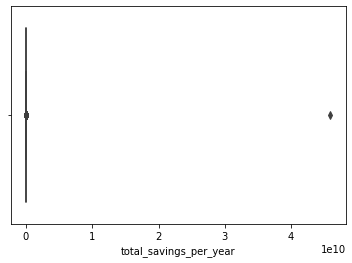

In [82]:
import seaborn as sns
sns.boxplot(x=new_dataframe['total_savings_per_year'])

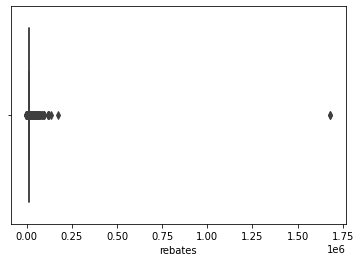

In [83]:
import seaborn as sns
sns.boxplot(x=new_dataframe['rebates'])

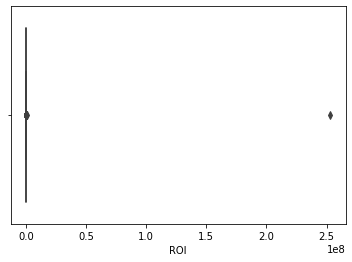

In [84]:
import seaborn as sns
sns.boxplot(x=new_dataframe['ROI'])

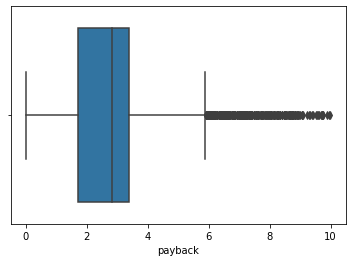

In [85]:
import seaborn as sns
sns.boxplot(x=new_dataframe['payback'])

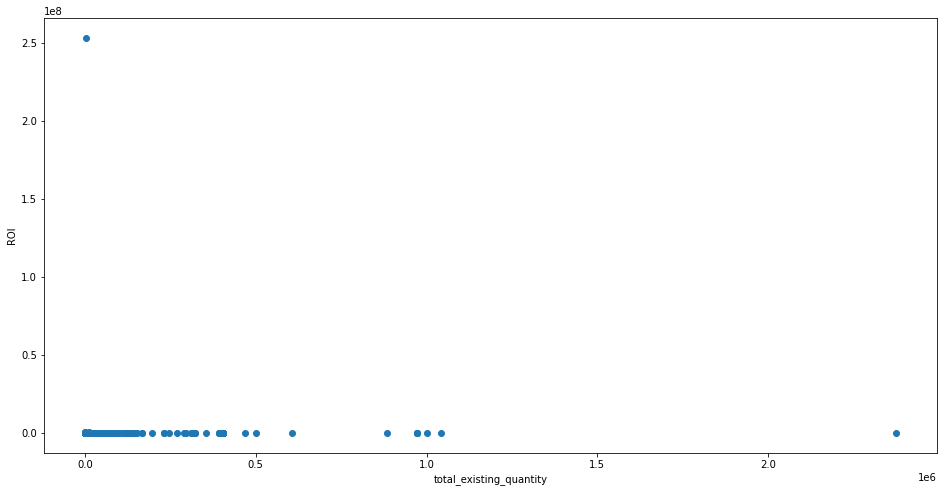

In [88]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(new_dataframe['total_existing_quantity'],new_dataframe['ROI'])
ax.set_xlabel('total_existing_quantity')
ax.set_ylabel('ROI')
plt.show()

**Z - score**

In [89]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(new_dataframe))
print(z)

[[           nan 6.22768751e-01 7.84946784e-02 ... 1.37186512e-02
  5.21633273e-16 1.36826993e-02]
 [           nan 7.77469996e-01 7.87580603e-02 ... 1.37182735e-02
  1.46705745e+00 1.35961937e-02]
 [           nan 7.77469996e-01 7.87580603e-02 ... 1.36755782e-02
  5.21633273e-16 1.36826993e-02]
 ...
 [           nan 6.22768751e-01 7.87259405e-02 ... 1.37186581e-02
  1.66674178e+00 1.36826993e-02]
 [           nan 7.77469996e-01 7.87580603e-02 ... 1.37020390e-02
  6.85939334e-01 1.36655677e-02]
 [           nan 7.77469996e-01 7.87580603e-02 ... 1.37175466e-02
  3.10806294e+00 1.36795848e-02]]


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [90]:
all0 = new_dataframe[(z < 3).all(axis=1)]

In [91]:
all0

,finance_discount_rate,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI


In [92]:
threshold = 3
print(np.where(z > 3))

(array([  11,   20,   20, ..., 5403, 5413, 5424]), array([30,  1, 14, ...,  9,  9, 30]))


**IQR value**

In [93]:
Q1 = new_dataframe.quantile(0.25)
Q3 = new_dataframe.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

finance_discount_rate        0.000000e+00
area_count                   6.000000e+00
area_count_sum               4.560000e+02
ave_annual_hours             1.328000e+03
monday_ave_daily_hours       0.000000e+00
tuesday_ave_daily_hours      0.000000e+00
wednesday_ave_daily_hours    0.000000e+00
thursday_ave_daily_hours     0.000000e+00
friday_ave_daily_hours       0.000000e+00
saturday_ave_daily_hours     0.000000e+00
sunday_ave_daily_hours       0.000000e+00
ave_weeks_per_year           0.000000e+00
max_kwh_cost                 5.000000e-02
max_kwh_cost_simple          0.000000e+00
existing_lighting_count      6.000000e+00
total_watts_per_product      3.498230e+05
ave_lm70                     7.611111e+03
total_existing_quantity      9.480000e+02
total_proposed_quantity      1.155000e+03
total_replacement_count      5.470000e+02
total_fixture_watts          8.802000e+02
total_fixture_watt_hours     7.794180e+07
total_fixture_life_years     4.236289e+02
total_item_watts             1.991

In [94]:
print(new_dataframe < (Q1 - 1.5 * IQR)) |(new_dataframe > (Q3 + 1.5 * IQR))

      finance_discount_rate  area_count  ...  payback    ROI
0                     False       False  ...    False  False
1                     False       False  ...    False  False
2                     False       False  ...    False  False
3                     False       False  ...    False  False
4                     False       False  ...    False  False
...                     ...         ...  ...      ...    ...
5420                  False       False  ...    False  False
5421                  False       False  ...    False  False
5422                  False       False  ...    False  False
5423                  False       False  ...    False  False
5424                  False       False  ...    False  False

[5425 rows x 32 columns]


TypeError: ignored

In [95]:
new_out = new_dataframe[~((new_dataframe < (Q1 - 1.5 * IQR)) |(new_dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
new_out.shape

(1425, 32)

**distribution plots**

count    5425.000000
mean        2.837940
std         1.702844
min         0.000000
25%         1.720000
50%         2.837940
75%         3.390000
max         9.990000
Name: payback, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


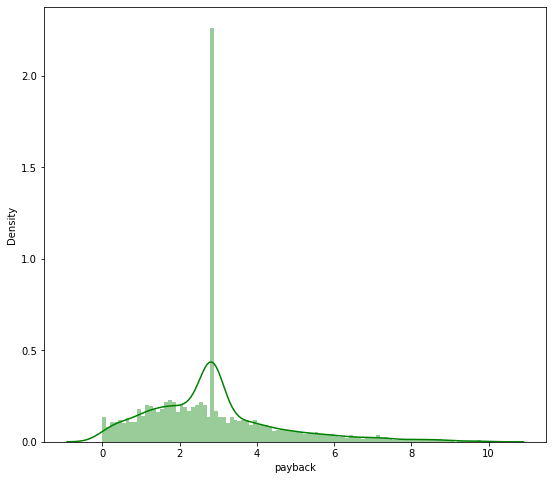

In [96]:
print(findata['payback'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(findata['payback'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    5.425000e+03
mean     4.244899e+06
std      3.094538e+08
min      0.000000e+00
25%      3.758090e+03
50%      1.279451e+04
75%      3.594089e+04
max      2.279273e+10
Name: net_replacement_cost, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


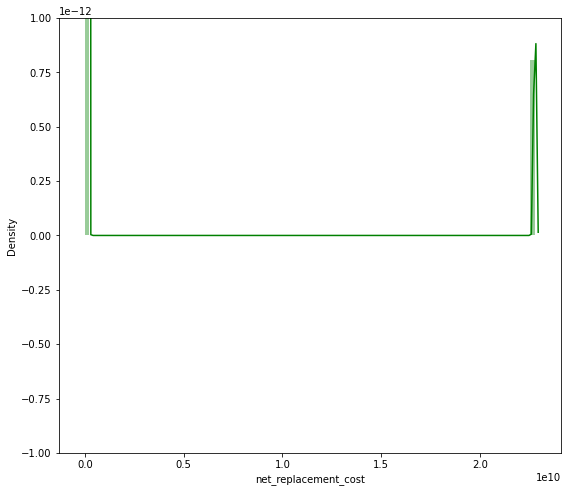

In [97]:
print(findata['net_replacement_cost'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(findata['net_replacement_cost'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    5.425000e+03
mean     1.320295e+04
std      3.296914e+04
min     -4.300000e+03
25%      1.320295e+04
50%      1.320295e+04
75%      1.320295e+04
max      1.681374e+06
Name: rebates, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


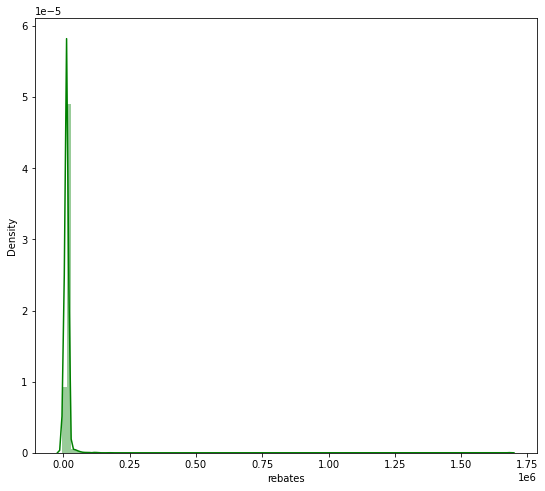

In [98]:
print(findata['rebates'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(findata['rebates'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    5.425000e+03
mean     8.476328e+06
std      6.232114e+08
min     -4.640000e+03
25%      8.414515e+02
50%      3.621822e+03
75%      1.154672e+04
max      4.590240e+10
Name: energy_savings_per_year, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


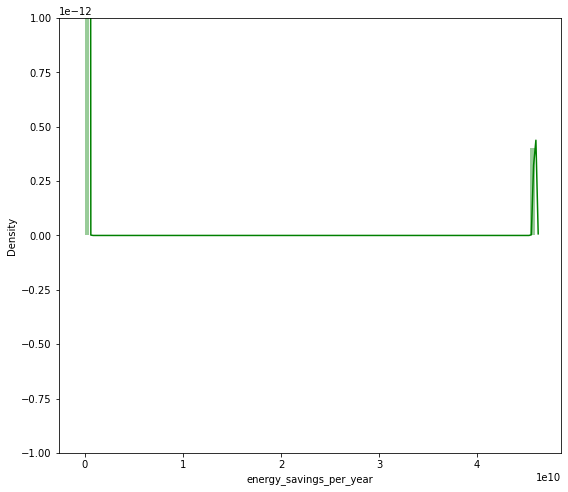

In [99]:
print(findata['energy_savings_per_year'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(findata['energy_savings_per_year'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [100]:
list(set(findata.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('bool'), dtype('float64')]

In [102]:
findata_ex = new_dataframe.select_dtypes(include = ['float64', 'int64'])
findata_ex.head()

,finance_discount_rate,area_count,area_count_sum,ave_annual_hours,monday_ave_daily_hours,tuesday_ave_daily_hours,wednesday_ave_daily_hours,thursday_ave_daily_hours,friday_ave_daily_hours,saturday_ave_daily_hours,sunday_ave_daily_hours,ave_weeks_per_year,max_kwh_cost,max_kwh_cost_simple,existing_lighting_count,total_watts_per_product,ave_lm70,total_existing_quantity,total_proposed_quantity,total_replacement_count,total_fixture_watts,total_fixture_watt_hours,total_fixture_life_years,total_item_watts,sol_total_existing_count,total_product_count,energy_savings_per_year,total_savings_per_year,rebates,net_replacement_cost,payback,ROI
0,5,2,42.0,4880.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.554901,0.155228,2,3276.0,13333.333333,56.0,56.0,56.0,0.0,0.0,0.000000,0.0,4,4,0.000000e+00,0.000000e+00,18.000000,2.1300,2.83794,0.000000
1,5,1,1.0,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,1,100.0,1000.000000,10.0,10.0,10.0,13.0,130000.0,50.000000,130.0,1,1,8.700000e+01,3.536667e+02,13202.949855,119.0000,0.34000,297.198880
2,5,1,1.0,4249.181784,1.416117,1.418917,1.427601,1.421139,1.421274,0.911292,0.52067,6.101727,6.554901,0.155228,1,1080.0,10000.000000,86.0,86.0,43.0,600.0,0.0,0.000000,12900.0,2,2,0.000000e+00,0.000000e+00,13202.949855,13330.0000,2.83794,0.000000
3,5,5,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,5,662760.0,22538.461538,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,6,6,6.217249e-15,6.217249e-15,13202.949855,0.0000,2.83794,0.000000
4,5,6,936.0,3727.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.100000,0.155228,6,795312.0,22538.461538,138.0,118.0,80.0,83.0,2097888.0,180.288462,1681.0,12,10,9.665942e+02,1.044594e+03,13202.949855,8489.2094,2.83794,12.304965


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0ee870710>,
      dtype=object)

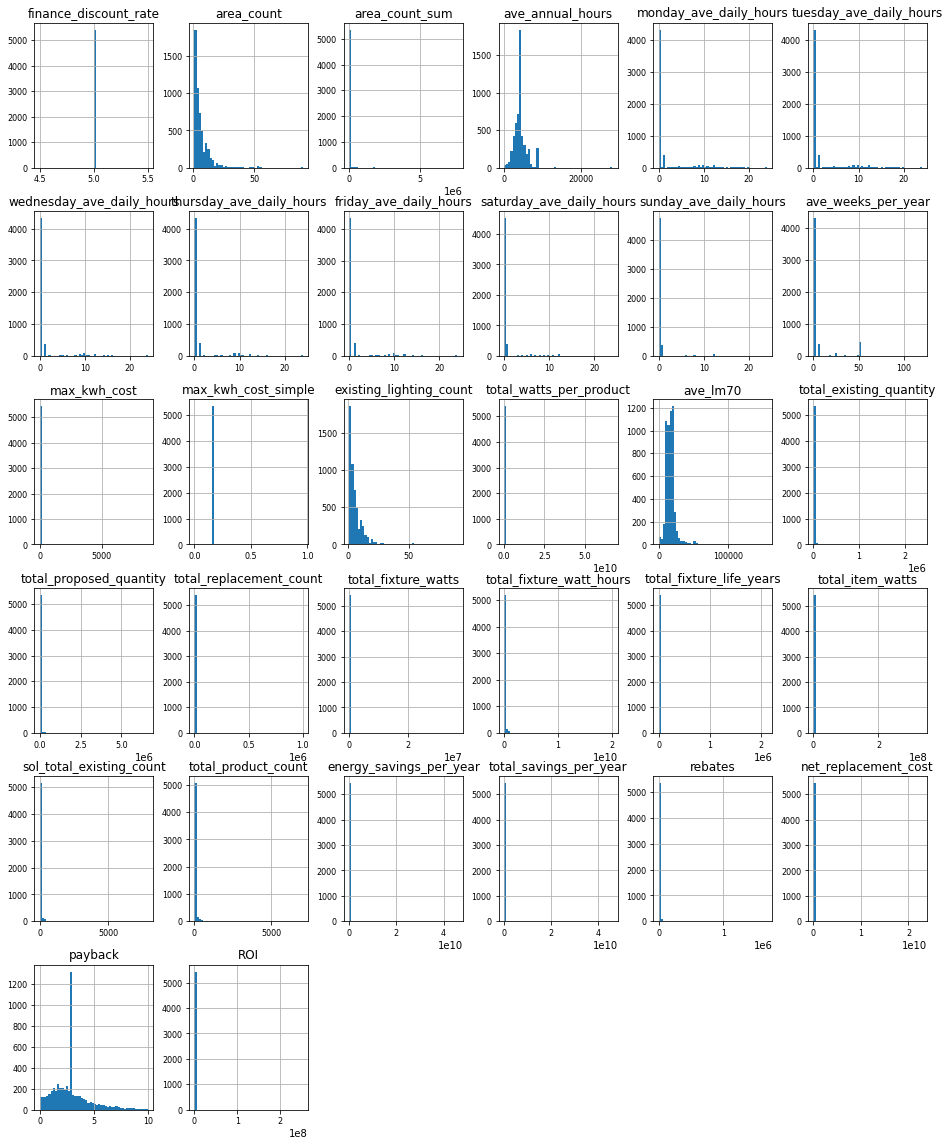

In [103]:
findata_ex.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

**Co-relations to ROI by other parameters**

In [106]:
findata_ex_corr = findata_ex.corr()['ROI'][:-1] # -1 because the latest row is SalePrice
golden_features_list = findata_ex_corr[abs(findata_ex_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with ROI:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with ROI:
Series([], Name: ROI, dtype: float64)



**Co-relations to payback by other parameters**



In [107]:
findata_ex_corr = findata_ex.corr()['payback'][:-1] # -1 because the latest row is SalePrice
golden_features_list = findata_ex_corr[abs(findata_ex_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with payback:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with payback:
payback    1.0
Name: payback, dtype: float64


In [ ]:
for i in range(0, len(findata_ex.columns), 5):
    sns.pairplot(data=findata_ex,
                x_vars=findata_ex.columns[i:i+5],
                y_vars=findata_ex['ROI'])

In [ ]:
import operator

individual_features_df = []
for i in range(0, len(findata_ex.columns) - 1): # -1 because the last column is ROI
    tmpDf = findata_ex[[findata_ex.columns[i], 'ROI']]
    tmpDf = tmpDf[tmpDf[findata_ex.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['ROI'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))